In [5]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
import numpy as np
okt = Okt()
kkma = Kkma()

In [4]:
import pandas as pd

try:
    with open('../김나윤/뉴스/삼성바이오_20230329-20230629.csv', encoding='ANSI') as file:
        news_data = pd.read_csv(file)
except UnicodeDecodeError:
    with open('../김나윤/뉴스/삼성바이오_20230329-20230629.csv', encoding='utf-8', errors='replace') as file:
        news_data = pd.read_csv(file)

In [20]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   뉴스 식별자             1404 non-null   float64
 1   일자                 1404 non-null   int64  
 2   언론사                1404 non-null   object 
 3   기고자                1389 non-null   object 
 4   제목                 1404 non-null   object 
 5   통합 분류1             1404 non-null   object 
 6   통합 분류2             1317 non-null   object 
 7   통합 분류3             1112 non-null   object 
 8   사건/사고 분류1          46 non-null     object 
 9   사건/사고 분류2          3 non-null      object 
 10  사건/사고 분류3          0 non-null      float64
 11  인물                 904 non-null    object 
 12  위치                 1228 non-null   object 
 13  기관                 1404 non-null   object 
 14  키워드                1404 non-null   object 
 15  특성추출(가중치순 상위 50개)  1404 non-null   object 
 16  본문                 1404 

# Cleaning

In [3]:
news_data = news_data[['키워드']]

NameError: name 'news_data' is not defined

In [7]:
news_data['키워드'] = news_data['키워드'].replace(',', ' ', regex=True)

In [11]:
news_data

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,2.100801e+06,20230629,아시아경제,장효원,"코스피, 기관 외국인 쌍끌이 매수에 장 중 강세",경제>증권_증시,경제>외환,경제>부동산,NaN,NaN,NaN,NaN,NaN,"POSCO홀딩스,JYP,기아,셀트리온제약,삼성전자,에코프로,엘앤에프,케어젠,SK하이...",코스피 기관 외국인 쌍끌 매수 강세 코스피지수 기관 외국인 매수세 상승세 29일 1...,"외국인,상승세,순매도,오름세,코스닥,종목들,코스피지수,코스피,삼성,하이닉스,엘앤에프...",코스피지수가 장 중 기관과 외국인의 매수세가 몰리며 상승세를 나타내고 있다.29일 ...,https://view.asiae.co.kr/article/2023062910281...,NaN
1,2.100201e+06,20230629,머니투데이,김창현|기자,외국인 매수세에 코스피 상승 출발... 시총 상위 종목 대부분 강세,경제>증권_증시,경제>외환,경제>자동차,NaN,NaN,NaN,파월,"서울,경기,강보합","기아,셀트리온제약,카카오,포스코퓨처엠,삼성전자,에코프로,케어젠,삼성SDI,더블유씨피...",외국인 매수세 출발 코스피 상승 종목 강세 시총 상위 종목 코스피 코스닥 동반 상승...,"코스피,강보합세,약보합,외국인,약보합세,순매도,업종별,코스닥,서울,파월,시총,포스코...",[머니투데이 김창현 기자] 코스피와 코스닥이 동반 상승 중이다. 파월 연준의장이 금...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN
2,2.100851e+06,20230629,아주경제,송하준,"[시황] 코스피, 외국인 매수세 전환에 상승 출발",경제>증권_증시,경제>부동산,경제>유통,NaN,NaN,NaN,한지영,미국,"한국거래소,키움증권,펄어비스,현대차,삼성전자,에코프로비엠,에코프로,LG에너지솔루션,...",코스피 전환 외국인 매수세 상승 출발 코스피 전환 외국인 매수세 상승 출발 한국 거...,"코스피,코스닥,외국인,미국,순매도,키움증권,한지영,매수세,하이닉스,펄어비스,파월,파...",[사진=아주경제 DB] \n \n코스피가 외국인 매수세 전환에 상승 출발했다. \n...,https://www.ajunews.com/view/20230629092152626,NaN
3,2.100601e+06,20230629,한국경제,신민경,"'약보합 출발' 코스피, 장 초반 상승 2570선서 거래",경제>증권_증시,경제>외환,경제>부동산,NaN,NaN,NaN,"서상영,제롬 파월","우호,미국,서울,경기,미,뉴욕증","JYP,기아,Fed,스탠더드앤드푸어스,다우존스,삼성전자,유가증권,에코프로,엘앤에프,...",약보합 출발 코스피 상승 초반 2570선 거래 출발 약보합 코스피지수 2570선 거...,"중앙은행,외국인,삼성전자,파월,혼조세,원어치,코스피,서상영,미래에셋증권,만큼,각국,...",29일 약보합 출발한 코스피지수가 2570선에서 거래되고 있다. \n \n이날 오전...,https://www.hankyung.com/finance/article/20230...,NaN
4,1.500701e+06,20230628,부산일보,송현수,"KIAT, 첨단바이오 산업 경쟁력 강화 방안 논의",경제>무역,경제>반도체,IT_과학>IT_과학일반,NaN,NaN,NaN,"박용,민병주","전주,미국,한국형,서울,송도","JW메리어트호텔,KIAT,첨단바,정부,GM,글로벌 바이오의약품,한국바이오협회,첨단바...",KIAT 첨단바이오 산업 경쟁력 강화 방안 논의 개최 산업 정책 포럼 바이오 규제 ...,"첨단바이오,센터장,삼성바이오로직스,서울,경쟁력,의약품,kiat,cdmo,민병주,송도...",28일 개최된 제3회 산업기술정책포럼에서 참석자들이 기념촬영을 하고 있다. KIAT...,https://www.busan.com/view/busan/view.php?code...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2.100801e+06,20230329,아시아경제,이광호,"코스피, 장 초반 강보합세 기관 '사자'",경제>증권_증시,경제>외환,경제>유통,NaN,NaN,NaN,서상영,"미국,서울,장,강보합,장전","셀트리온제약,셀트리온헬스케어,코스닥,미래에셋증권,마이크론,삼성전자,에코프로비엠,LG...",코스피 강보합세 초반 기관 외인 코스피 코스닥 매수세 기준 금리 인상 조기 종료 코...,"코스피,코스닥,순매도,외국인,삼성전자,미래에셋증권,서울,서상영,미국,삼성,마이크론,...",코스피가 기관 움직임에 힘입어 장 초반 강보합세를 보이고 있다. \n \n29일 오...,https://view.asiae.co.kr/article/2023032909324...,NaN
1400,2.100601e+06,20230329,한국경제,진영기,"코스피, 기관 '사자'에 강보합 2430선 횡보",경제>증권_증시,경제>외환,경제>부동산,NaN,NaN,NaN,서상영,"최고경영자,미국,장,강보합,장전,뉴욕증,메로트라","셀트리온제약,스탠더드앤드푸어스,다우존스,삼성전자,엘앤에프,삼성바이오로직스,삼성SDI...",코스피 기관 강보합 2430선 횡보 코스피 기관 강보합세 초반 29일 기준 코스피 ...,"마이크론,코스닥,코스피,외국인,순매도,삼성전자,미래에셋증권,뉴욕증시,서상영,미국,메...",코스피가 기관의 '사자'세에 힘입어 장 초반 강보합세를 보이고 있다. \n \n29...,https://www.hankyung.com/finance/article/20230...,NaN
1401,2.100201e+06,20230329,머니투데이,홍재영|기자,외국인 코스피 코스닥서 순매도 기관 매수에 코스피 강보합,경제>증권_증시,경제>유통,경제>외환,NaN,NaN,NaN,NaN,"뉴욕증시,미국,강보합","POSCO홀딩스,JYP,기아,카카오,네이버,다우존스,삼성전자,에코프로,엘앤에프,카카...",외국인 코스피 코스닥 순매도 기관 매수 코스피 하락 출발 코스피 기관 매수세 강보합...,"코스피,약보합,외국인,코스닥,거래일,종이목재,종목들,미국,하이닉스,삼성,lg,jyp...",[머니투데이 홍재영 기자] 하락 출발한 코스피가 기관의 매수세에 강보합 전환했다. ...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN
1402,2.100201e+06,20230329,머니투데이,이창섭|기자,R&D 비용 19조 vs 4123억 K바이오 빅파마 격차 여전,경제>유통,IT_과학>과학,경제>증권_증시,NaN,NaN,NaN,NaN,브리스톨마이어스퀴브,"SK바이오사이언스,종근당,대웅제약,일라이릴리,유한양행,삼성바이오로직스,J&J,한미약...",4123억 R&D 비용 vs K바이오 격차 여전 제약 바이오 기업 R&D 비용 글로...,"로슈,차세대,항암제,노바티스,아스트라제네카,셀트리온,대웅제약,일동제약,유한양행,우리...",[머니투데이 이창섭 기자] 지난해 국내 제약 바이오 기업의 연구 개발(R&D) 비용...,http://news.moneytoday.co.kr/view/mtview.php?n...,NaN


In [4]:
import re
regex = r'[^\w\s]'
# text 열의 모든 값을 대상으로 정규표현식을 적용하여 특수문자를 제거
news_data['본문'] = news_data['본문'].apply(lambda x: re.sub(regex, '', str(x)))
news_data['제목'] = news_data['제목'].apply(lambda x: re.sub(regex, '', str(x)))

In [3]:
#!pip install konlpy
from konlpy.tag import Kkma        
kkma = Kkma()
from konlpy.tag import Hannanum    
hannanum = Hannanum()
from konlpy.tag import Okt         
t = Okt() 
from konlpy.tag import *
import nltk
import pickle
import copy
from tqdm import tqdm

In [11]:
pos_tag = []

# news_data 데이터프레임의 각 행에 대해 반복
for _, row in tqdm(news_data.iterrows()):
    # 현재 행의 content 값을 news_text 변수에 할당
    news_text = row['본문']
    news_text = row['내용']
    
    # PosTagging
    tokens_ko = t.pos(news_text)
    pos_tag.append(tokens_ko)

0it [00:00, ?it/s]


KeyError: '내용'

In [ ]:
#첫번째 행의 Pos Tagging
print(pos_tag[0])

In [ ]:
normalization_li = []
for pos in pos_tag: 
    in_li = []
    for ele in pos:
        #품사가 조사, 접속사이면 continue
        if ele[1] in ['Josa','Suffix']:
            continue
        in_li.append(ele[0])
    normalization_li.append(in_li)
print(normalization_li[0])

In [ ]:
with open('../김나윤/data/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거
okt = Okt()

In [ ]:
tokens = normalization_li
token_stop = []
for token in tokens:
    in_li = []
    for tok in token:
        if tok not in stopwords:
            in_li.append(tok)
    token_stop.append(in_li)
print(token_stop[0]) 

In [ ]:
df_li = []
for tokens in token_stop:
    token = ' '.join(tokens)
    df_li.append(token)
df = pd.DataFrame(df_li).rename(columns = {0:'preprocess_context'})
df.head()

In [ ]:
news_data = pd.concat([news , df],axis=1)
#비어있는 5개의 행은 '없음'으로 결측치 처리
news_data['내용'] = news_data['내용'].fillna('없음')
news_data['preprocess_context'] = news_data['preprocess_context'].fillna('없음')
news_data.head()

In [ ]:
# news_data.to_csv('하이닉스_preprocess.csv', index=False, encoding='utf-8-sig')

In [1]:
import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma        ; kkma = Kkma()
from konlpy.tag import Hannanum    ; hannanum = Hannanum()
from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *
import nltk
import pickle

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz
from sklearn.tree import export_graphviz

import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [6]:
key = news_data[['키워드']]

In [4]:
preprocess = pd.read_csv('./data/삼성바이오로직스_preprocess.csv')

In [8]:
preprocess = news_data

In [9]:
news_text = ''
news_data = preprocess.reset_index(drop=True)
for _, row in news_data.iterrows():
    news_text += row['키워드']

In [17]:
tokens_ko = t.morphs(news_text)
ko = nltk.Text(tokens_ko)

#print(len(ko.tokens))    
num = len(ko.tokens)      # 토큰 전체 개수
print(len(set(ko.tokens)))     # 토큰 unique 개수
print(ko.vocab().most_common(10))

19062
[('바이오', 9367), ('삼성', 3668), ('성', 3407), ('삼', 3082), ('로', 3007), ('직스', 2977), ('기업', 2752), ('지수', 2335), ('상승', 2334), ('포인트', 2228)]


In [21]:
stop_words = ['바이오','삼성','성','삼','로', '적', '이', '셀트리온']

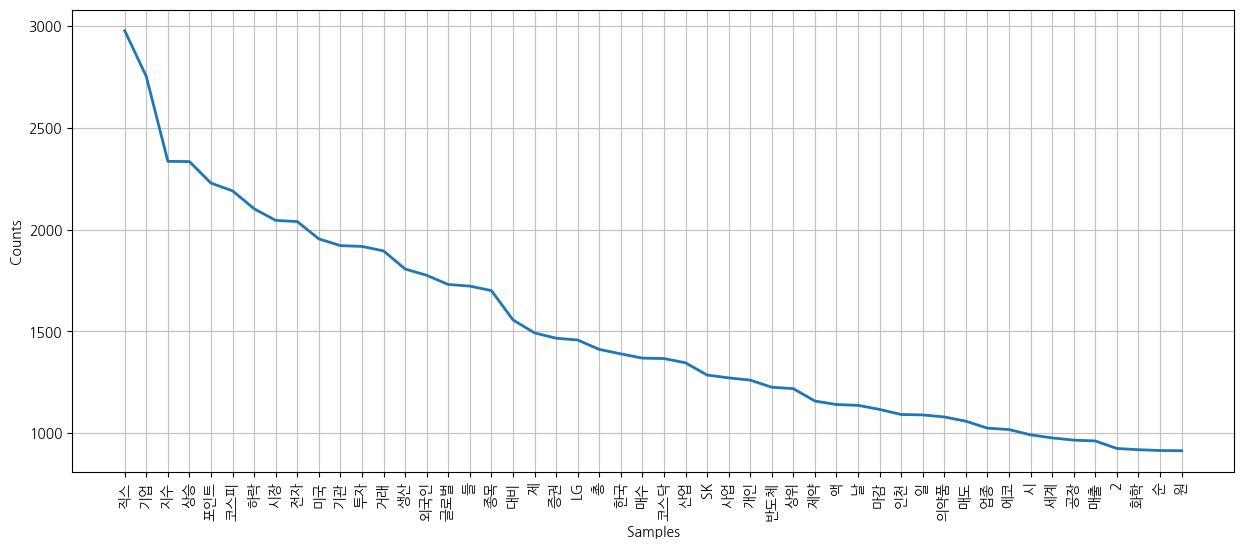

In [22]:
tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stop_words]

ko = nltk.Text(tokens_ko)

# 그래프에서 한글 폰트가 깨질 경우 실행
# from matplotlib import font_manager, rc
# font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
# rc('font', family=font_name)

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

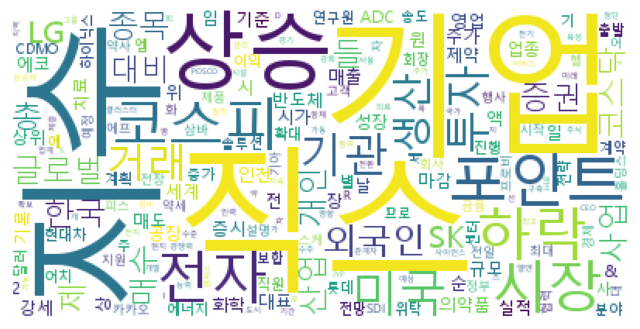

In [23]:
data = ko.vocab().most_common(num)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [30]:
data

[('직스', 2977),
 ('기업', 2752),
 ('지수', 2335),
 ('상승', 2334),
 ('포인트', 2228),
 ('코스피', 2190),
 ('하락', 2102),
 ('시장', 2045),
 ('전자', 2039),
 ('미국', 1954),
 ('기관', 1921),
 ('투자', 1917),
 ('거래', 1895),
 ('생산', 1806),
 ('외국인', 1775),
 ('글로벌', 1730),
 ('들', 1722),
 ('종목', 1700),
 ('대비', 1556),
 ('제', 1492),
 ('증권', 1466),
 ('LG', 1457),
 ('총', 1411),
 ('한국', 1389),
 ('매수', 1368),
 ('코스닥', 1366),
 ('산업', 1345),
 ('SK', 1285),
 ('사업', 1271),
 ('개인', 1260),
 ('반도체', 1225),
 ('상위', 1218),
 ('제약', 1157),
 ('액', 1140),
 ('날', 1136),
 ('마감', 1116),
 ('인천', 1091),
 ('일', 1089),
 ('의약품', 1079),
 ('매도', 1058),
 ('업종', 1024),
 ('에코', 1017),
 ('시', 991),
 ('세계', 976),
 ('공장', 965),
 ('매출', 961),
 ('2', 924),
 ('화학', 918),
 ('순', 914),
 ('원', 913),
 ('증시', 890),
 ('규모', 869),
 ('&', 842),
 ('시가', 827),
 ('장', 804),
 ('강세', 799),
 ('영업', 790),
 ('대표', 788),
 ('전', 780),
 ('성장', 761),
 ('실적', 737),
 ('기준', 735),
 ('임', 728),
 ('기록', 727),
 ('상', 726),
 ('ADC', 725),
 ('치료', 718),
 ('위', 716),
 ('주가', 705),


In [32]:
df = pd.DataFrame(data, columns=['단어','빈도'])

TypeError: DataFrame.__init__() got an unexpected keyword argument 'index_col'

In [29]:
df.to_csv('word_삼성바이오로직스.csv')

In [19]:
data = ko.vocab().most_common(13000)